<a href="https://colab.research.google.com/github/Ryan10isaac/ImageClassification/blob/main/ImageClassificationUsingAnnCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape
y_train.shape


y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

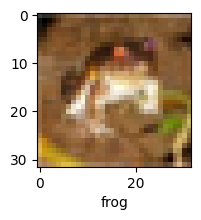

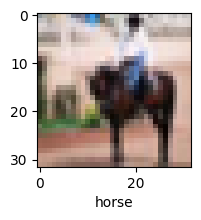

In [4]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 11)

In [5]:
#Normalizing the Data

X_train = X_train / 255.0
X_test = X_test / 255.0

# Artficial Neural Network


In [6]:
#Build artificial neural network for image classification

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3031 - loss: 1.9345
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4168 - loss: 1.6528
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4502 - loss: 1.5560
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4728 - loss: 1.4869
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4929 - loss: 1.4384


In [7]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.37      0.73      0.49      1000
           1       0.50      0.72      0.59      1000
           2       0.32      0.45      0.37      1000
           3       0.44      0.15      0.22      1000
           4       0.42      0.41      0.42      1000
           5       0.45      0.30      0.36      1000
           6       0.59      0.41      0.48      1000
           7       0.65      0.42      0.51      1000
           8       0.60      0.54      0.57      1000
           9       0.51      0.51      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



# Convolutional Neural Network

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3819 - loss: 1.7081
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5937 - loss: 1.1589
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6441 - loss: 1.0136
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6743 - loss: 0.9275
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7030 - loss: 0.8593
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7211 - loss: 0.8038
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7359 - loss: 0.7551
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.7047
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7699 - loss: 0.6588
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7818 - loss: 0.6222


In [10]:
ypred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [11]:
y_classes = [np.argmax(element) for element in ypred_cnn]

print('Y_pred:' ,y_classes[:5])
print('Y-test',y_test[:5])

Y_pred: [3, 8, 8, 0, 6]
Y-test [3 8 8 0 6]


In [12]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.69      0.74      1000
           1       0.82      0.81      0.82      1000
           2       0.59      0.62      0.61      1000
           3       0.49      0.58      0.53      1000
           4       0.67      0.62      0.64      1000
           5       0.70      0.49      0.57      1000
           6       0.74      0.82      0.78      1000
           7       0.70      0.79      0.74      1000
           8       0.79      0.83      0.81      1000
           9       0.78      0.77      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



frog


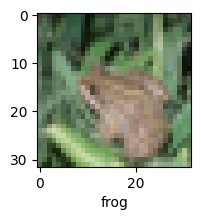

In [13]:
plot_sample(X_test, y_test,4)

print(classes[y_classes[4]])

airplane


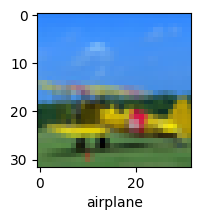

In [14]:
plot_sample(X_test, y_test,44)

print(classes[y_classes[44]])